In [1]:
#importing required libraries
# from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
# from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
# import plotly
# import plotly.figure_factory as ff
# from plotly.graph_objs import Scatter, Layout

# plotly.offline.init_notebook_mode(connected=True)
# warnings.filterwarnings("ignore")

import gensim
import collections
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
# from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize 

In [2]:
#reading csv files and filling the NaN values
if os.path.isfile('users.csv'):
    users = pd.read_csv("users.csv", nrows=22000)
    apps = pd.read_csv("apps.csv")
else:
    print("get users.csv from drive or run the previous notebook")

In [3]:
users.columns

Index(['user_id', 'prefered_location', 'user_education', 'user_skills',
       'user_education_year', 'work_history_count', 'user_experience',
       'currently_employed', 'managed_others', 'managed_howmany'],
      dtype='object')

In [4]:
apps.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id'],
      dtype='object')

In [5]:
apps.head(1)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,mm media pvt ltd,ug b tech b e to any specialization pg any ...,0 to 1 years,media entertainment internet,job description â ownend me jobs ...,210516002263,chennai,walkin data entry operator night shift,NaN,150k to 225k p a,2016-05-21 19:30:00 +0000,NaN,ites,43b19632647068535437c774b6ca6cf8


In [6]:
# def read_data(row,column_name):
#     return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
# documents = []
# for index, row in users.iterrows():
#     documents.append(read_data(row,"prefered_location"))
#     documents.append(read_data(row,"user_education"))
#     documents.append(read_data(row,"user_skills"))
#     documents.append(read_data(row,"currently_employed"))
    
# for index, row in apps.iterrows():
#     documents.append(read_data(row,"education"))
#     documents.append(read_data(row,"joblocation_address"))
#     documents.append(read_data(row,"jobtitle"))
#     documents.append(read_data(row,"skills"))
    
    

In [7]:
# model = gensim.models.Word2Vec(size=300, window=20, min_count=0, sg=1, workers=15)
# model.build_vocab(documents)  # prepare the model vocabulary

In [8]:
# model.train(sentences=documents, total_examples=len(documents), epochs=model.iter)

In [9]:
#data preprocessing steps

#preprocessing the text removing the noisy data
import re
from nltk.tokenize import sent_tokenize, word_tokenize 
stop_words = stopwords.words("english")

def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("yrs", " years")\
                           .replace("-", " to").replace("/", " ").replace(",", "")
        
                            
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
#     porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
#     if type(x) == type(''):
#         x = porter.stem(x)
#         example1 = BeautifulSoup(x)
#         x = example1.get_text()
               
               
    
    return x 

In [10]:
# applying data preprocessing
users["prefered_location"] = users["prefered_location"].fillna("").apply(preprocess)
users["user_education"] = users["user_education"].fillna("").apply(preprocess)
users["user_skills"] = users["user_skills"].fillna("").apply(preprocess)
users["user_education_year"] = users["user_education_year"].fillna("").apply(preprocess)
users["user_experience"] = users["user_experience"].fillna("").apply(preprocess)
users["currently_employed"] = users["currently_employed"].fillna("").apply(preprocess)



apps["company"] = apps["company"].fillna("").apply(preprocess)
apps["experience"] = apps["experience"].fillna("").apply(preprocess)
apps["education"] = apps["education"].fillna("").apply(preprocess)
apps["jobdescription"] = apps["jobdescription"].fillna("").apply(preprocess)
apps["joblocation_address"] = apps["joblocation_address"].fillna("").apply(preprocess)
apps["jobtitle"] = apps["jobtitle"].fillna("").apply(preprocess)
apps["payrate"] = apps["payrate"].fillna("").apply(preprocess)
apps["skills"] = apps["skills"].fillna("").apply(preprocess)

In [11]:
def againpreprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
            .replace("ug", "under graduate").replace("pg", "post graduate")\
            .replace("b tech", "bachelor of technology").replace("b e", "bachelor of engineering")\
            .replace("p a", "per annum").replace("mca", "master of computer applications")
                           
    return x

In [12]:
apps["education"] = apps["education"].fillna("").apply(againpreprocess)
apps["payrate"] = apps["payrate"].fillna("").apply(againpreprocess)

In [13]:
# stopwords removal
stop = stopwords.words('english')

users['user_skills'] = users['user_skills'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

apps['jobdescription'] = apps['jobdescription'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
apps['jobtitle'] = apps['jobtitle'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
apps['skills'] = apps['skills'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
# apps['experience'] = apps['experience'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
apps['education'] = apps['education'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
apps['payrate'] = apps['payrate'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

In [14]:
#lemmatization

from textblob import TextBlob
from textblob import Word

apps['education'] = apps['education'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
apps['experience'] = apps['experience'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
apps['jobdescription'] = apps['jobdescription'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
apps['jobtitle'] = apps['jobtitle'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
apps['payrate'] = apps['payrate'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
apps['skills'] = apps['skills'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [16]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle


with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)

# model = pickle.dump(model, word2vec_model, protocol=4)

    

In [17]:
# model.most_similar('delhi')

In [18]:
# Utility functions

def get_word_vec(sentence, doc_id, m_name):
    # sentence : title of the apparel
    # doc_id: document id in our corpus
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus, we are just ignoring it
            vec.append(np.zeros(shape=(300,)))
    # we will return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return  np.array(vec)

def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1 we caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)


def heat_map_w2v(sentence1, sentence2, doc_id1, doc_id2, model):
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentence1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentence2, doc_id2, model)

    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    
    
    # devide whole figure into 2 parts 1st part displays heatmap 2nd part displays image of apparel
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    # ploting the heap map based on the pairwise distances
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    # set the x axis labels as recommended apparels title
    ax.set_xticklabels(sentence2.split())
    # set the y axis labels as input apparels title
    ax.set_yticklabels(sentence1.split())
    # set title as recommended apparels title
    ax.set_title(sentence2)
    
    ax = plt.subplot(gs[1])
    # we remove all grids and axis labels for image
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
#     display_img(url, ax, fig)
    
    plt.show()

In [19]:
vocab = model.keys()
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  tfidf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, tfidf_all_features[doc_id, tfidf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

In [20]:
apps.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id'],
      dtype='object')

In [21]:
doc_id = 0
# w2v_title = []

w2v_title = []
# w2v_aeducation = []
# w2v_ueducation = []
# for every title we build a avg vector representation

users1 = users[['prefered_location', 'user_education', 'user_skills', 'currently_employed']]

apps1 = apps[['education', 'joblocation_address', 'jobtitle', 'skills']]

data = pd.concat([users1, apps1], axis=1, sort=False)

# for i in apps['joblocation_address']:
#     w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
#     doc_id += 1
    
# for i in users['prefered_location']:
#     w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
#     doc_id += 1

# for i in apps['skills']:
#     w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
#     doc_id += 1

for i in users['user_education']:
    w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
    doc_id += 1

    
# for i in apps['jobtitle']:
#     w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
#     doc_id += 1

    
# for i in users['currently_employed']:
#     w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
#     doc_id += 1

    
    
# for i in apps['joblocation_address']:
#     w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
#     doc_id += 1

# for i in users['prefered_location']:
#     w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
#     doc_id += 1

    
# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title = np.array(w2v_title)

# w2v_title = hstack(w2v_aeducation, w2v_ueducation).tocsr()


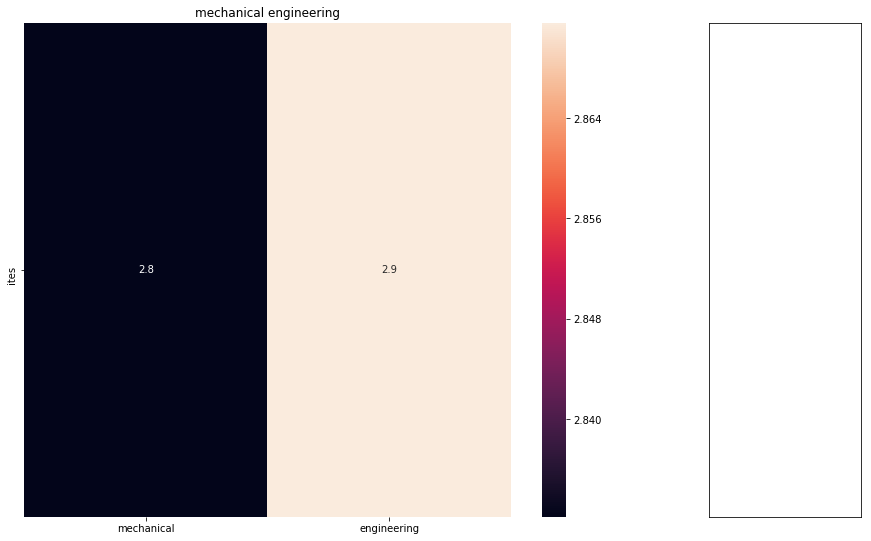

User ID : 47
User Skills: ites
User Location: chennai
Currently employed: yes
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


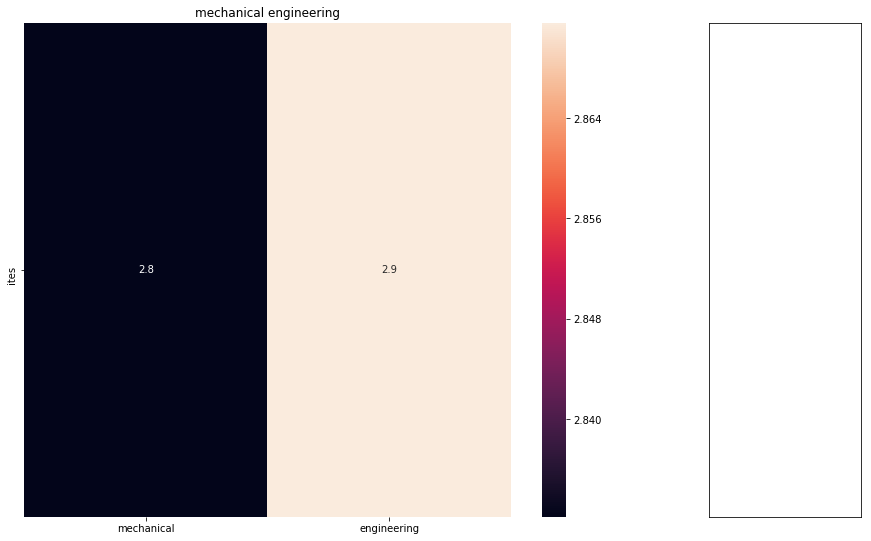

User ID : 560808
User Skills: production
User Location: chennai  coimbatore  trichy
Currently employed: yes
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


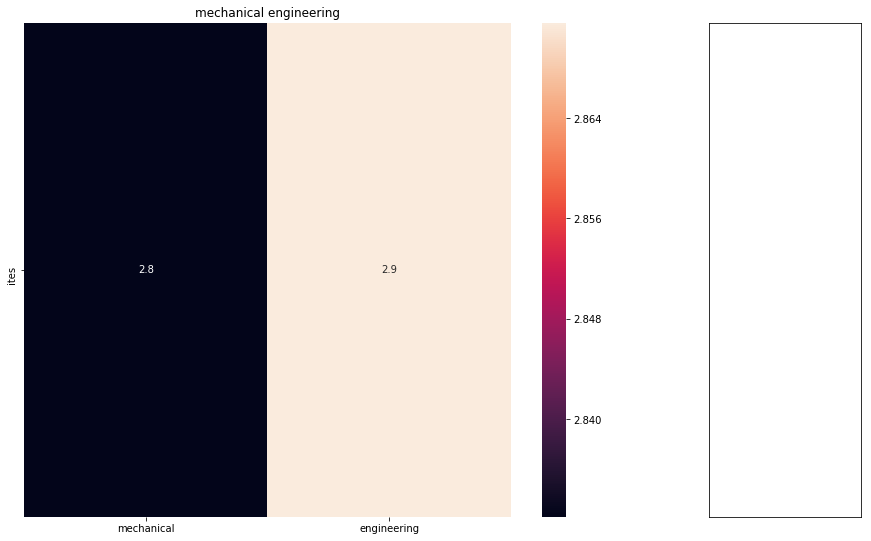

User ID : 484857
User Skills: sales
User Location: pune bengaluru ahmedabad
Currently employed: yes
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


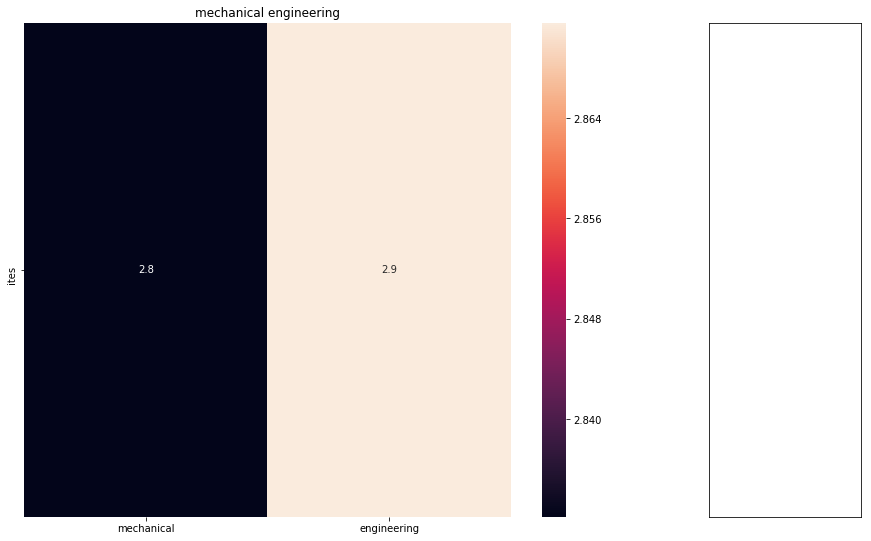

User ID : 98735
User Skills: sales
User Location: bengaluru bangalore  chennai
Currently employed: no
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


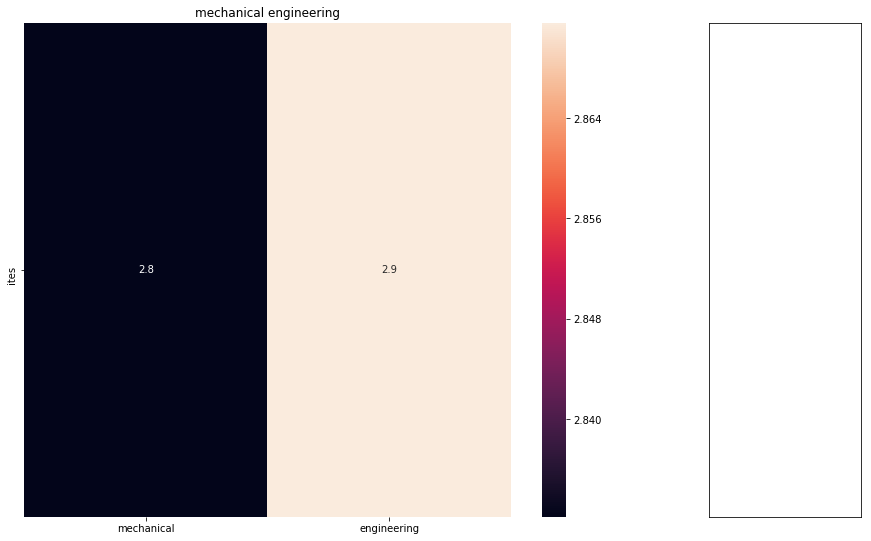

User ID : 364439
User Skills: marketing
User Location: noida  noida greater noida
Currently employed: yes
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


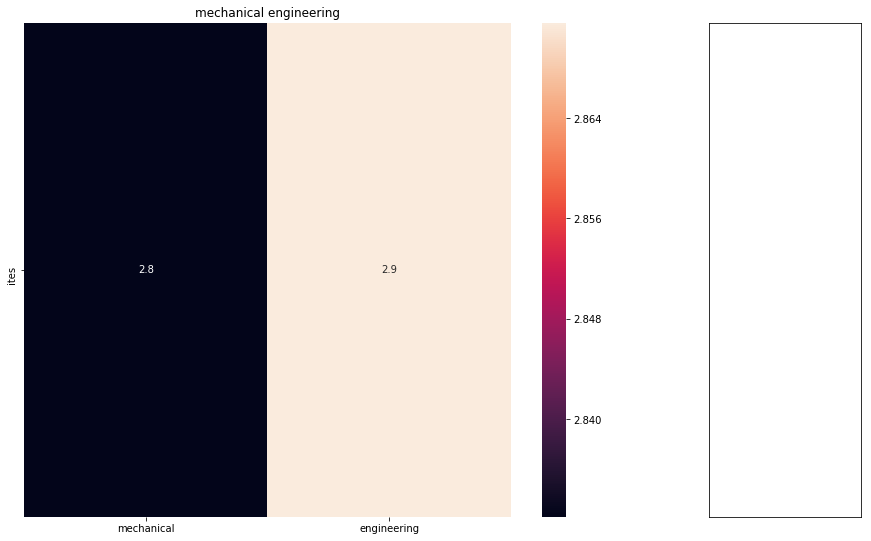

User ID : 364745
User Skills: software application programming
User Location: delhi  delhi
Currently employed: yes
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


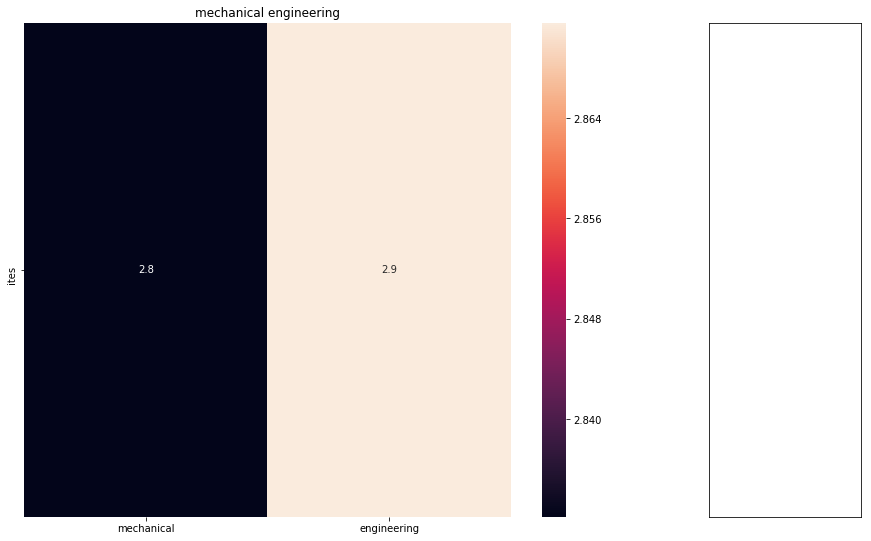

User ID : 99064
User Skills: software
User Location: chennai  bengaluru bangalore
Currently employed: no
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


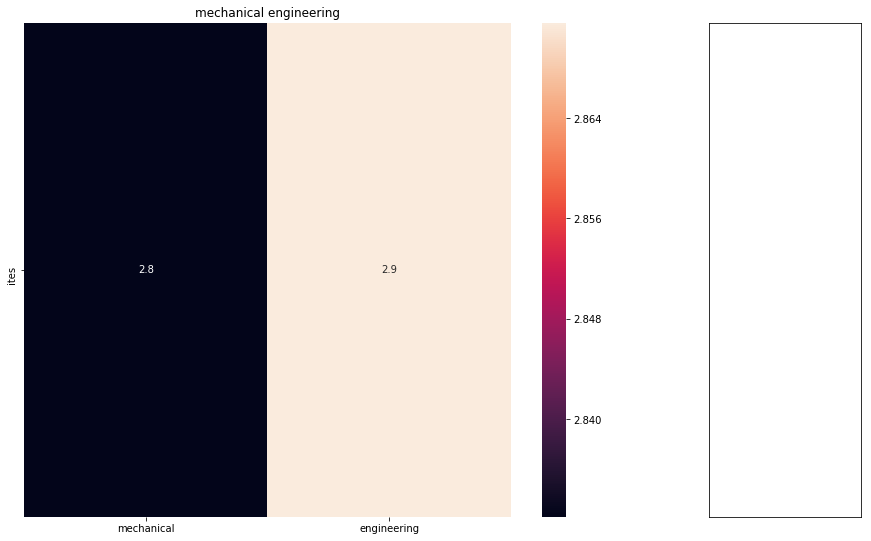

User ID : 39935
User Skills: software erp
User Location: bengaluru
Currently employed: yes
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


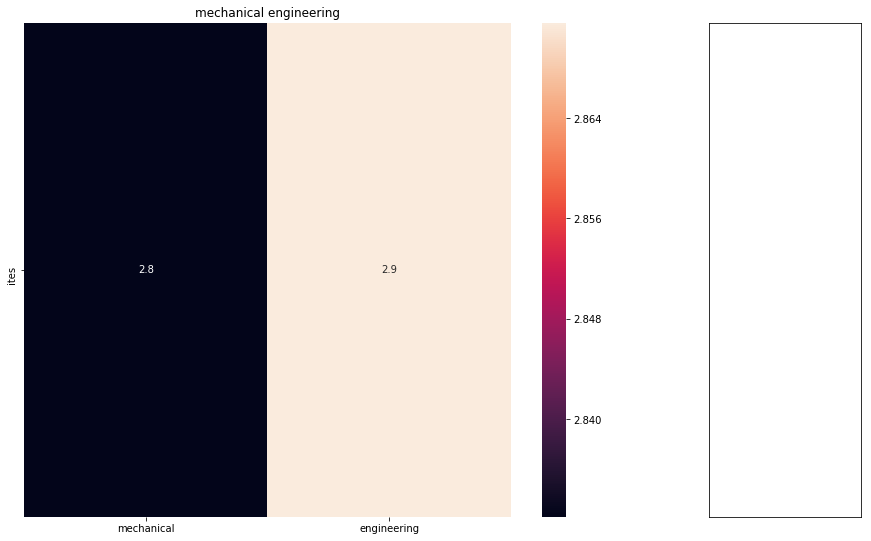

User ID : 561286
User Skills: software application programming
User Location: bengaluru bangalore  hyderabad   secunderabad  chennai
Currently employed: no
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


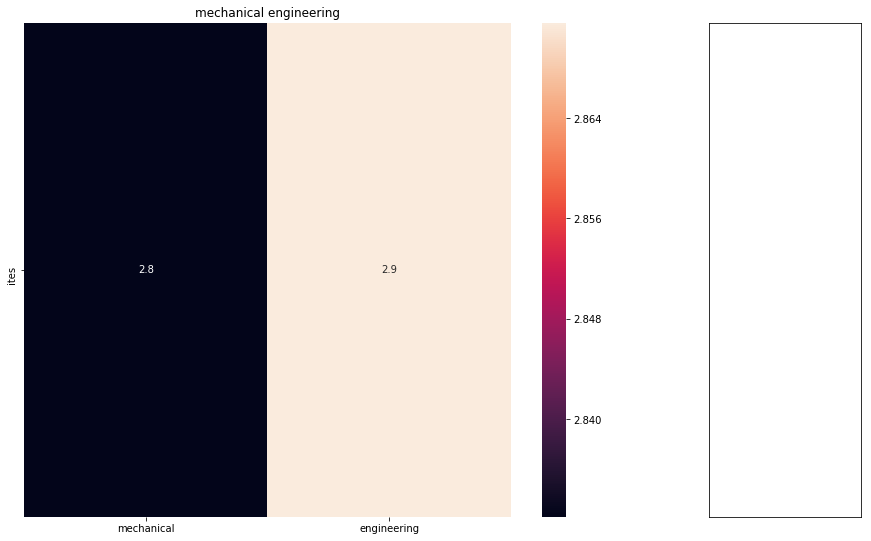

User ID : 484628
User Skills: software erp
User Location: bengaluru
Currently employed: no
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


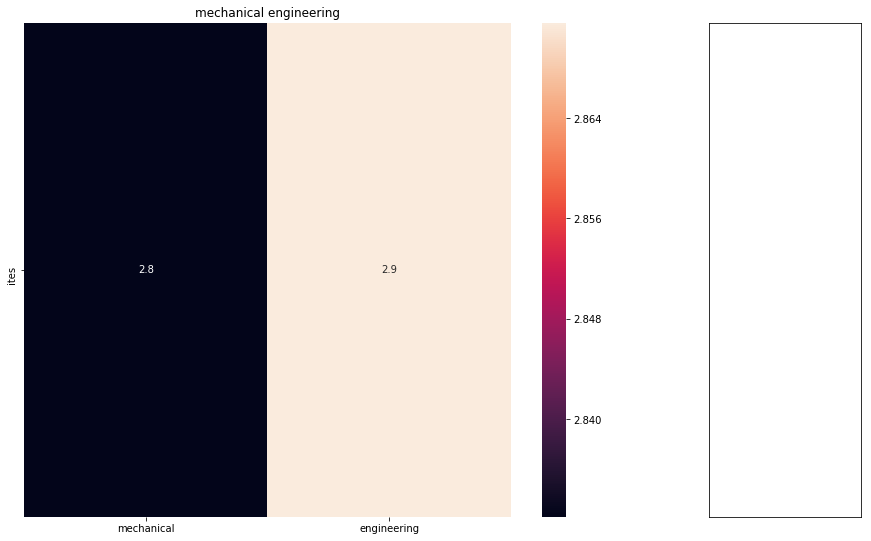

User ID : 99288
User Skills: financial services
User Location: bengaluru bangalore  mumbai  chennai  pune  hyderabad   secunderabad  kolkata  trivandrum  rajahmundry  delhi ncr national capital region 
Currently employed: no
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


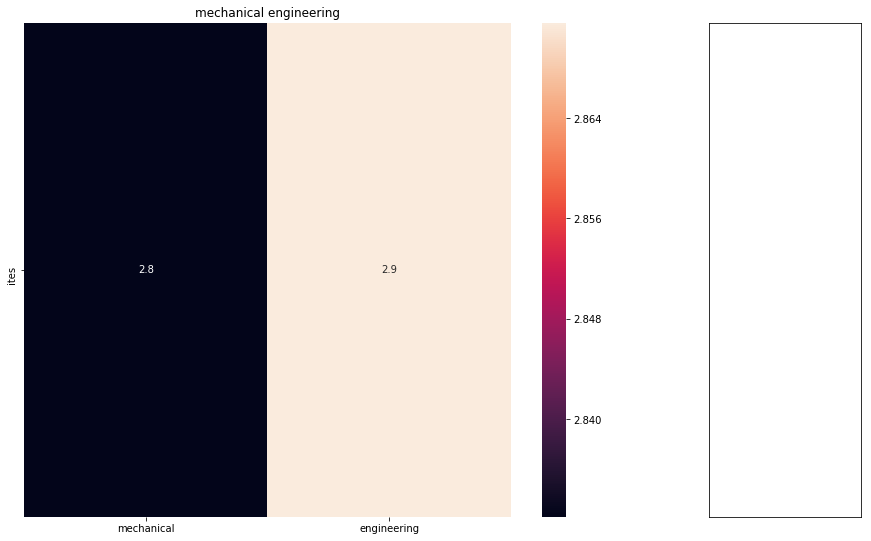

User ID : 364818
User Skills: software application programming
User Location: delhi  delhi
Currently employed: yes
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


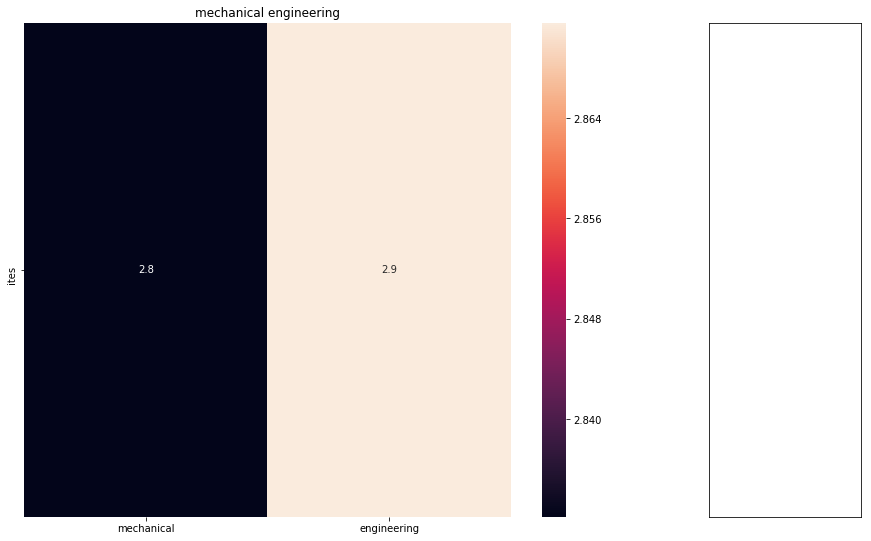

User ID : 39709
User Skills: travel
User Location: bengaluru
Currently employed: yes
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


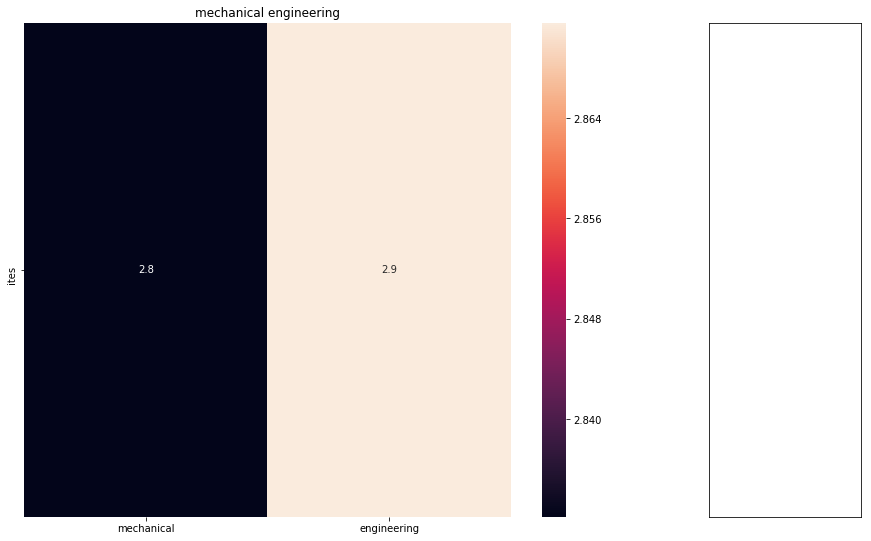

User ID : 230879
User Skills: marketing
User Location: bengaluru bangalore
Currently employed: no
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


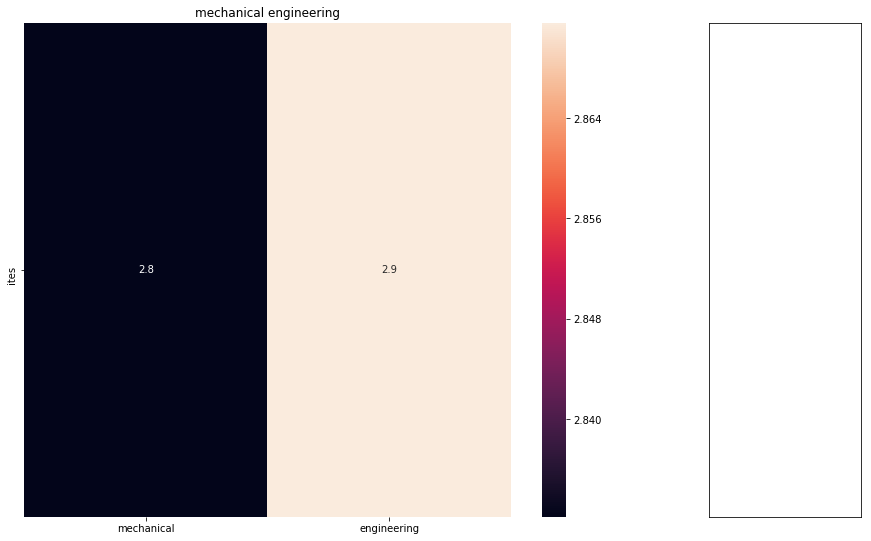

User ID : 300254
User Skills: ites
User Location: chennai bangalore  mumbai pune  hyderabad kolkata
Currently employed: yes
User education: mechanical engineering
Euclidean similarity with the query image : 0.0


In [25]:
def avg_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))
    pairwise_dist = pairwise_distances(w2v_title, w2v_title[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    users_df_indices = list(users.index[indices])
    
    for i in range(0,len(indices)):
        heat_map_w2v(users['user_skills'].loc[users_df_indices[0]],users['user_education'].loc[users_df_indices[i]],indices[0], indices[i], 'avg')
        print('User ID :',users['user_id'].loc[users_df_indices[i]])
        print ('User Skills:', users['user_skills'].loc[users_df_indices[i]])
        print ('User Location:', users['prefered_location'].loc[users_df_indices[i]])
        print ('Currently employed:', users['currently_employed'].loc[users_df_indices[i]])
        print ('User education:', users['user_education'].loc[users_df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*64)
        
avg_w2v_model(0, 15)
# in the give heat map, each cell contains the euclidean distance between words i, j

In [26]:
# tfidf similarity based approach

tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_atitle_features = tfidf_title_vectorizer.fit_transform(apps['jobtitle'])
tfidf_aeducation_features = tfidf_title_vectorizer.fit_transform(apps['education'])
tfidf_ueducation_features = tfidf_title_vectorizer.fit_transform(users['user_education'])
tfidf_askills_features = tfidf_title_vectorizer.fit_transform(apps['skills'])
tfidf_uskills_features = tfidf_title_vectorizer.fit_transform(users['user_skills'])
# tfidf_uexperience_features = tfidf_title_vectorizer.fit_transform(data['users_experience'])
tfidf_aexperience_features = tfidf_title_vectorizer.fit_transform(apps['experience'])
tfidf_uemployed_features = tfidf_title_vectorizer.fit_transform(users['currently_employed'])
tfidf_ulocation_features = tfidf_title_vectorizer.fit_transform(users['prefered_location'])
tfidf_alocation_features = tfidf_title_vectorizer.fit_transform(apps['joblocation_address'])

In [27]:
tfidf_all_features = hstack((tfidf_atitle_features, tfidf_aeducation_features, tfidf_ueducation_features,
                            tfidf_askills_features,tfidf_uskills_features,tfidf_aexperience_features,
                            tfidf_uemployed_features,tfidf_ulocation_features,tfidf_alocation_features)).tocsr()

tfidf_all_features.get_shape()

(22000, 8403)

In [28]:
doc_id = 0
w2v_title_weight = []
# for every title we build a avg vector representation

users1 = users[['prefered_location', 'user_education', 'user_skills', 'currently_employed']]

apps1 = apps[['education', 'joblocation_address', 'jobtitle', 'skills']]

data = pd.concat([users1, apps1], axis=1, sort=False)

for i in users['user_skills']:
    w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1


# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title_weight = np.array(w2v_title)


In [31]:
def weighted_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    users_df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
#         heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'weighted')
        print('User ID :',users['user_id'].loc[users_df_indices[i]])
        print ('User Skills:', users['user_skills'].loc[users_df_indices[i]])
        print ('User Location:', users['prefered_location'].loc[users_df_indices[i]])
        print ('Currently employed:', users['currently_employed'].loc[users_df_indices[i]])
        print ('User education:', users['user_education'].loc[users_df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*64)

weighted_w2v_model(0, 5)
#931
#12566
# in the give heat map, each cell contains the euclidean distance between words i, j

User ID : 256432
User Skills: sales
User Location: mumbai
Currently employed: yes
User education: intermediate
Euclidean similarity with the query image : 0.0
User ID : 265618
User Skills: analytics business intelligence
User Location: mumbai
Currently employed: no
User education: bachelors
Euclidean similarity with the query image : 0.0
User ID : 89590
User Skills: software dba
User Location: bengaluru bangalore  chennai
Currently employed: no
User education: bachelors
Euclidean similarity with the query image : 0.0
User ID : 561358
User Skills: software application programming
User Location: chennai
Currently employed: no
User education: bachelors
Euclidean similarity with the query image : 0.0
User ID : 305492
User Skills: analytics business intelligence
User Location: bengaluru bangalore
Currently employed: no
User education: intermediate
Euclidean similarity with the query image : 0.0
